# LGMVIP Task 1 - Iris Flowers Classification

### Sonal Suhas Rao

# Importing modules

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# Loading the dataset

In [14]:
df0 = pd.read_csv("iris.data", header=None)
header_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df0.to_csv("Iris.csv", header=header_list, index=False)
df = pd.read_csv("Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data summarization

In [15]:
df.shape

(150, 5)

In [16]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [21]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data visualization

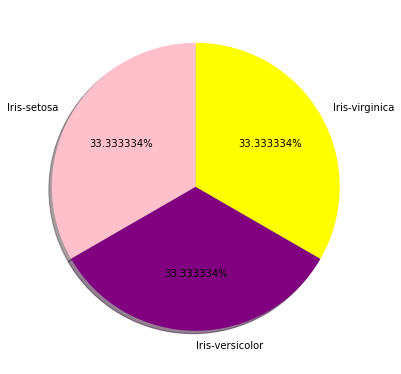

In [22]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['pink','purple','yellow']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1f%%', colors=colors, shadow=True, startangle=90)
plt.show()

# Pairplot

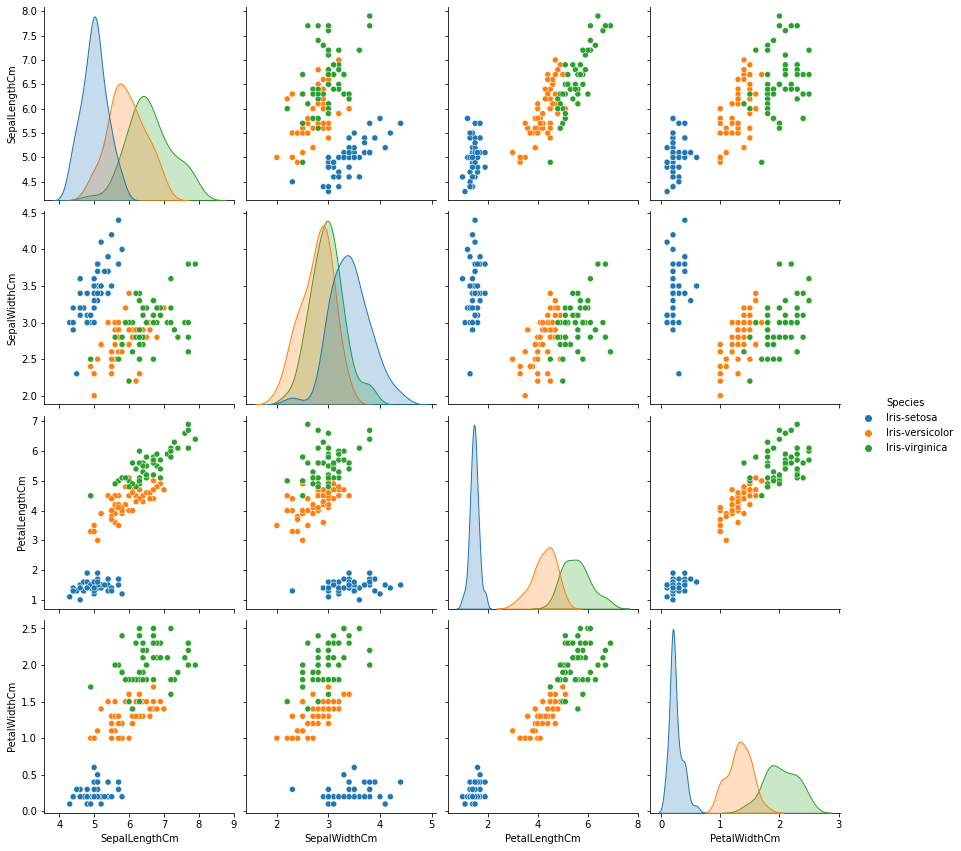

In [136]:
sns.pairplot(df, hue='Species', size=3)
plt.show()

# Exploratory Data Analysis

<AxesSubplot:xlabel='Species', ylabel='count'>

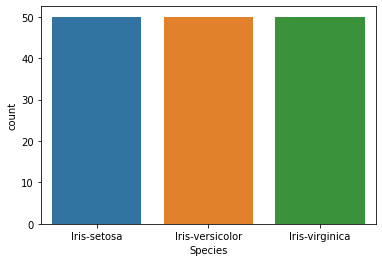

In [137]:
sns.countplot(df['Species'])

# Box and Whisker Plot

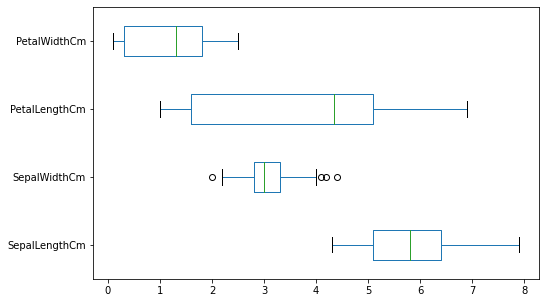

In [138]:
df.plot(kind='box',figsize=(8,5), vert=False);

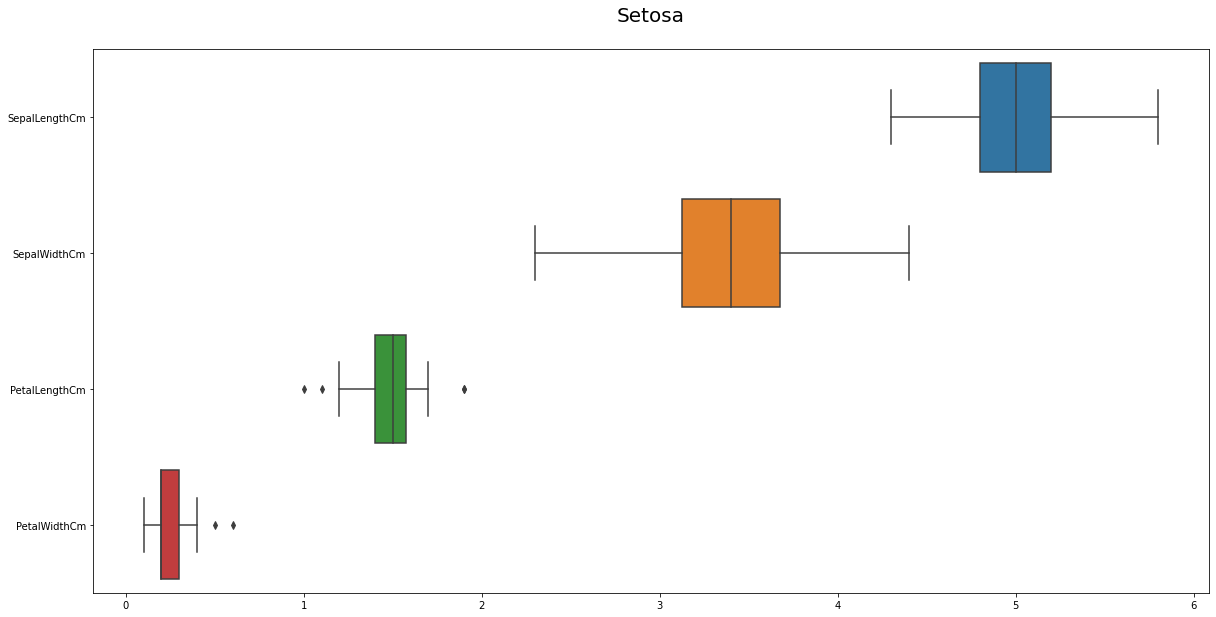

In [139]:
plt.figure(figsize=(20,10))
setosa = df[df['Species'] == "Iris-setosa"]
bp = sns.boxplot(data = setosa, orient="h")
bp.set_title("Setosa\n", fontsize = 20)
plt.show()

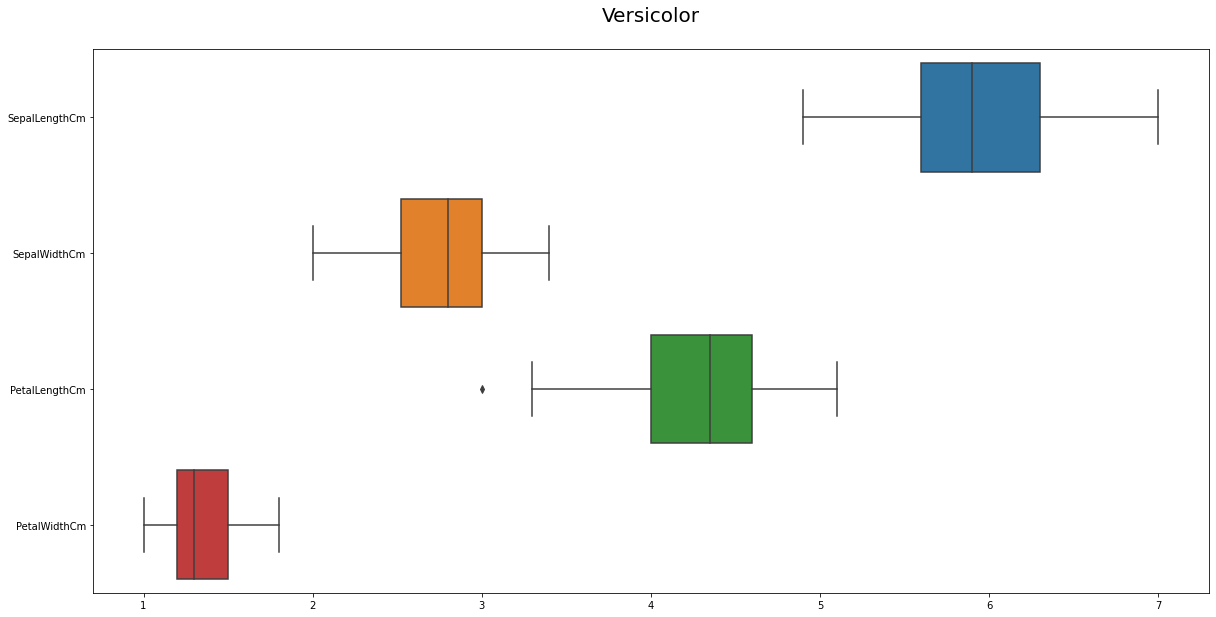

In [140]:
plt.figure(figsize=(20, 10))
versicolor = df[df['Species'] == "Iris-versicolor"]
bp = sns.boxplot(data = versicolor, orient="h")
bp.set_title("Versicolor\n", fontsize = 20)
plt.show()

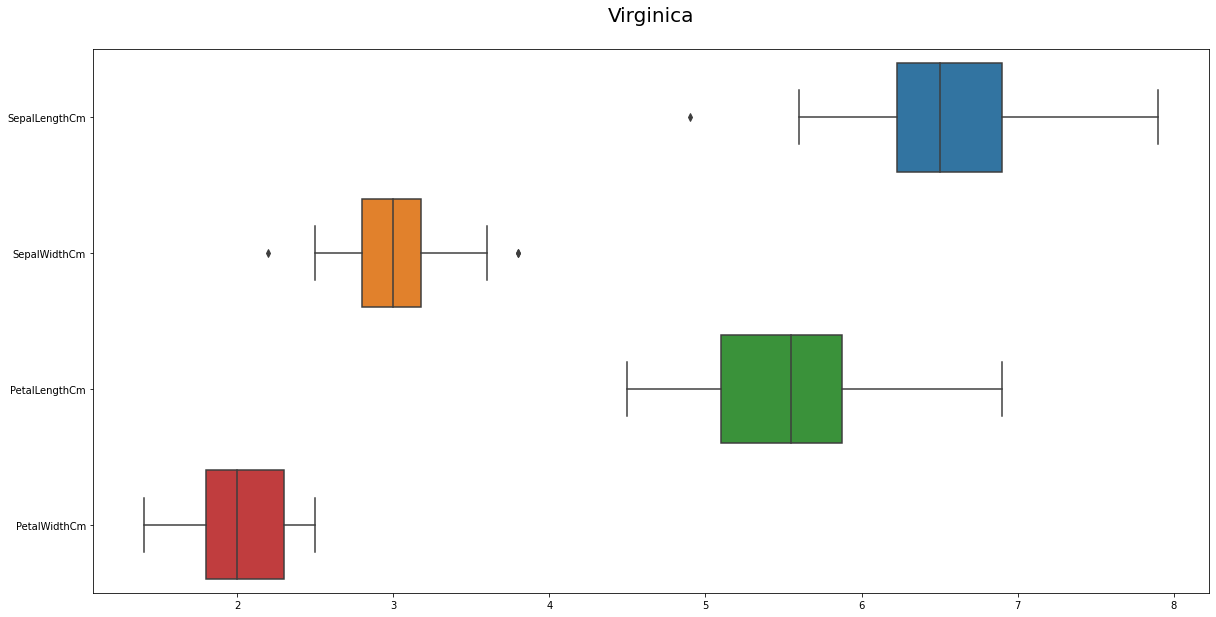

In [141]:
plt.figure(figsize=(20, 10))
virginica = df[df['Species'] == "Iris-virginica"]
bp = sns.boxplot(data = virginica, orient="h")
bp.set_title("Virginica\n", fontsize = 20, )
plt.show()

# Histograms

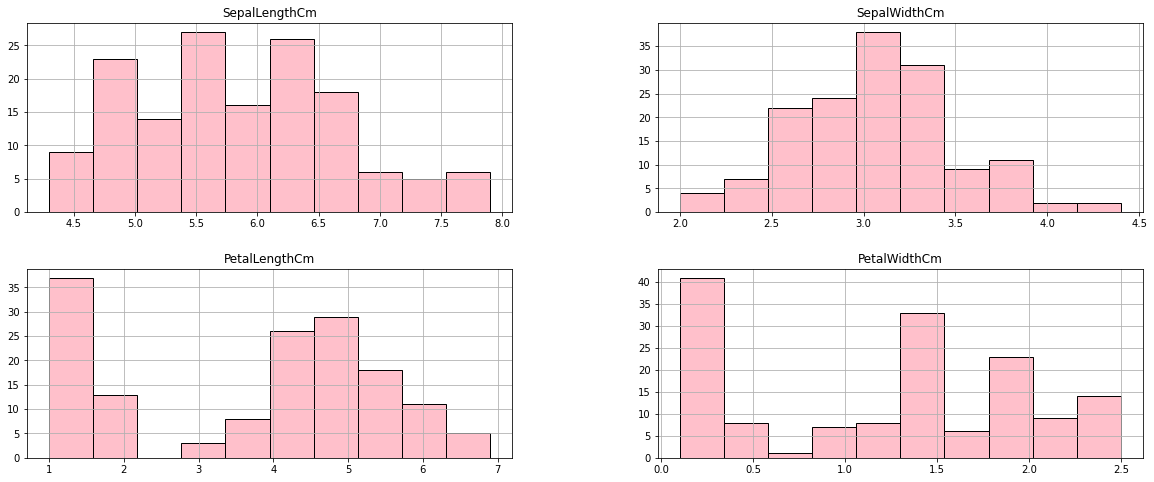

In [142]:
fig = plt.figure(figsize=(20, 8))
df.hist(ax = fig.gca(), color="pink", edgecolor="black")
plt.show()

# Scatter plot

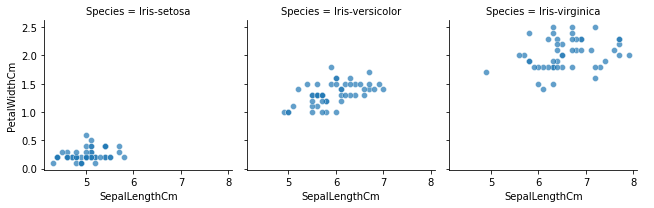

In [143]:
grid = sns.FacetGrid(df, col="Species");
grid.map(sns.scatterplot, "SepalLengthCm","PetalWidthCm", alpha=.7);
grid.add_legend()

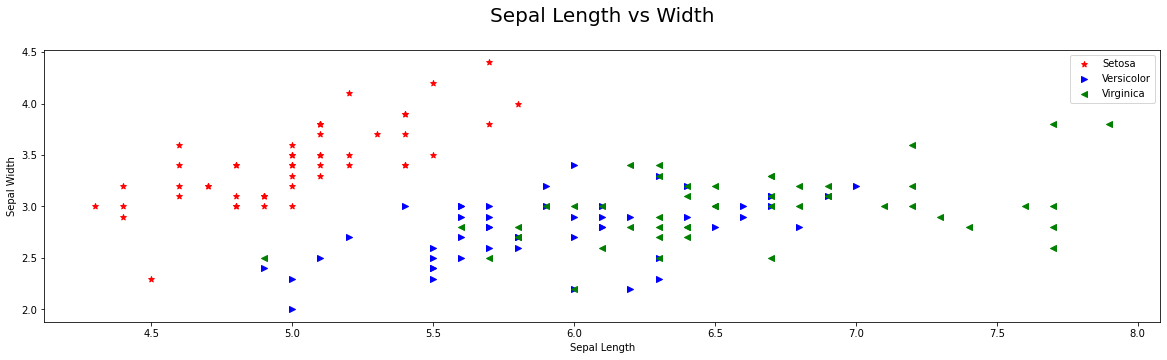

In [144]:
plt.figure(figsize=(20, 5))
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c="red", label="Setosa", marker = '*')
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="blue", label="Versicolor", marker = '>')
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="green", label="Virginica" , marker = '<')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width\n", fontsize=20)
plt.legend()


# Label Encoder



<AxesSubplot:>

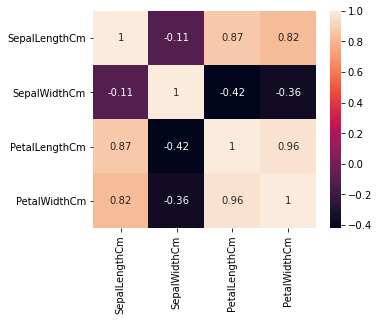

In [146]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

## Encoding categorical dependent variable

In [27]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['Species'], 1)
y = df['Species']
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting Dataset into Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Selecting the Models and Metrics

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## Training and Evaluating the Models

In [31]:
models = [lr, knn, svm, nb, dt, rf]
scores = []
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  print("Accuracy of " + type(model).__name__ + " is", accuracy_score(y_test, y_pred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of RandomForestClassifier is 0.9555555555555556


# Model Training

In [32]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [33]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [36]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [37]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [39]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


# Splitting the data

In [41]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
train , test = train_test_split(df,test_size=0.2,random_state=0)
print('shape of training data : ', train.shape)
print('shape of testing data', test.shape)

shape of training data :  (120, 5)
shape of testing data (30, 5)


In [43]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [44]:
model = LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

# KMEANS

In [48]:
x = df.iloc[:,[0,1,2,3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Prediction

In [50]:
predict = model.predict(test_x)
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [51]:
y_test_pred = model.predict(test_x)
y_train_pred = model.predict(train_x)

In [52]:

print("Training Accuracy: ", accuracy_score(train_y, y_train_pred))
print("Test Accuracy: ", accuracy_score(test_y, y_test_pred))

Training Accuracy:  0.9666666666666667
Test Accuracy:  1.0


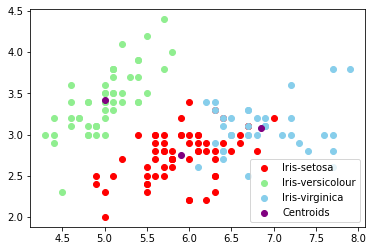

In [53]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'lightgreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'skyblue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'purple', label = 'Centroids')
plt.legend()

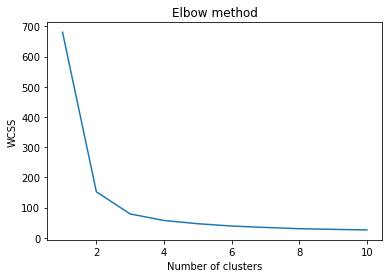

In [54]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [112]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.977778
1     K-Nearest Neighbors  0.977778
2  Support Vector Machine  0.977778
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333
